In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Gambler's Fallacy - Law of small numbers
- Given
    + A fair coin p(H) = p(T) = 0.5
    + Each coin toss is `independent` from each other
    + We plan to toss 200 times
        + The 1st 100 tosses result observed: 70 H, 30 T
- What is the best prediction of the next 100 tosses
    + A: 30 H, 70 T -> Overall: 100 H, 100 T
    + B: 50 H, 50 T -> Overall: 120 H, 80 T

#### Solve

- Let define
    - H1: heads in the 1st 100 tosses
    - H2: heads in the last 100 tosses

- Because each toss is independent -> H1 and H2 are independent

$$P(H_2|H_1) = P(H_2)$$

- The past(H1) is fixed; The future is not depedent on the past -> `B` is likely to happens (120 H, 80 T)


In [2]:
def do_exp(N=1000):
    no_disp = 5
    H_0_200_lst = []
    
    # Do exp N times
    for exp in range(N):
        # Do exp: tosses 200 times
        res = random.choices(
            ['H', 'T'], weights = [0.5, 0.5], k=200)
    
        # Get the 1st 100 tosses result
        H_0_100 = 0
        for i in res[:100]:
            if i == 'H': H_0_100 += 1

        # Get stats of the last 100 tosses if H_0_100 = 70
        if H_0_100 == 70:
            H_100_200 = 0
            for i in res[100:]:
                if i == 'H': H_100_200 += 1
            H_0_200_lst.append(H_0_100 + H_100_200)
            if no_disp > 0:
                no_disp -= 1
                print(f'''Number of H in the first 100 tosses: {H_0_100}
Number of H in the last 100 tosses: {H_100_200}
Overall: {H_0_100 + H_100_200} H
''')
    return sum(H_0_200_lst)/ len(H_0_200_lst), len(H_0_200_lst)

In [3]:
pred, len_H_0_200 = do_exp(N=1000000)
print(f"Predict number of heads after 200 tosses given 1st 100 tosses has 70H: {pred}, total cases: {len_H_0_200}")

Number of H in the first 100 tosses: 70
Number of H in the last 100 tosses: 54
Overall: 124 H

Number of H in the first 100 tosses: 70
Number of H in the last 100 tosses: 39
Overall: 109 H

Number of H in the first 100 tosses: 70
Number of H in the last 100 tosses: 44
Overall: 114 H

Number of H in the first 100 tosses: 70
Number of H in the last 100 tosses: 50
Overall: 120 H

Number of H in the first 100 tosses: 70
Number of H in the last 100 tosses: 53
Overall: 123 H

Predict number of heads after 200 tosses given 1st 100 tosses has 70H: 119.8125, total cases: 16


## Gambler's Fallacy vs Regression toward the mean
-  Gambler's Fallacy and Regression toward the mean `are not contradict`

- Regression toward the mean:
    + If we observe an extreme result, for example toss a fair coin 3 times, result = HHH. RTTM said that the next observation will be less extreme (will not be HHH or TTT, should be THT or HTT, ...)
    + `In the long run`, observations converge (slowly) toward the mean

- Gambler's Fallacy:
    + The result of the next oberservation is `independent` from the previous observation
    + Gambler's Fallacy is well applied in `the short run (Law of small numbers)`, for example toss a fair coin 3 times, result = 111. The next toss can be either 0 or 1 equally

# 2. Law of Large Numbers
#### Law of Large Numbers
- The average of the results obtained from a large number of trials should be close to the expected value
- As the sample size increase, the sample means gets closer to the population mean

In [4]:
# Population
mu = 5
std = 10

def get_sample(sample_size):
    '''Experiment: Normal distribution'''
    return np.random.randn(sample_size)*std + mu

In [5]:
for sample_size in [10,100,1000,10000,100000,int(1e6),int(1e7)]:
    print(f'sample size = {sample_size}, population mean = {mu}, sample mean = {get_sample(sample_size).mean()}')

sample size = 10, population mean = 5, sample mean = 9.738496403112821
sample size = 100, population mean = 5, sample mean = 5.507672063057483
sample size = 1000, population mean = 5, sample mean = 4.725234693164011
sample size = 10000, population mean = 5, sample mean = 5.1662257413076125
sample size = 100000, population mean = 5, sample mean = 5.020023429391301
sample size = 1000000, population mean = 5, sample mean = 4.979674064009714
sample size = 10000000, population mean = 5, sample mean = 4.997868179497323


# 3. Central Limit Theorem
- Given a population: (Applied to any type of distribution)
    + Take N samples from population
- As N increased, The distribution of samples means will be normal distributed $\hat{\mu} \sim N(\mu, \sigma)$
    + mean of samples mean = population mean

#### Application
- Significance Tests
- Confidence Intervals


In [6]:
def get_sample_2_dice(sample_size):
    '''Experiment: Sum of 2 dice rolls'''
    results = np.random.randint(1, 7, sample_size) + np.random.randint(1, 7, sample_size) 
    return results.mean()

def get_sample_means(sample_size, N=10000):
    sample_means = []
    for n in range(N):
        sample_mean = get_sample_2_dice(sample_size=sample_size).mean()
        sample_means.append(sample_mean)
    return np.array(sample_means)

Sample mean ~ N(6.998844000000001, 0.7623836802770371)


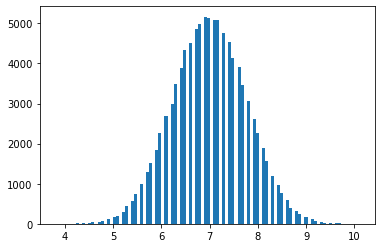

In [7]:
sample_means = get_sample_means(sample_size=10, N=100000)
mu_hat = sample_means.mean()
sigma_hat = sample_means.std(ddof=1)

print(f'Sample mean ~ N({mu_hat}, {sigma_hat})')

plt.hist(x=sample_means, bins=100)
plt.show()

#### Population ~ N
- Given a population $\sim N(\mu, \sigma)$
    + Take N samples from population
- As N increased, The distribution of samples means will be normal distributed $\hat{\mu} \sim N \left(\mu, \frac{\sigma}{\sqrt{\text{sample size}}} \right)$

In [8]:
# Population
mu = 5
std = 10

def get_sample(sample_size):
    '''Experiment: Normal distribution'''
    return np.random.randn(sample_size)*std + mu

def get_sample_means(sample_size, N=10000):
    sample_means = []
    for n in range(N):
        sample_mean = get_sample(sample_size=sample_size).mean()
        sample_means.append(sample_mean)
    return np.array(sample_means)

===== Sample size = 10 =====
Population ~ N(5, 10)
Sample mean ~ N(5.004467250435187, 3.1643427781881175)


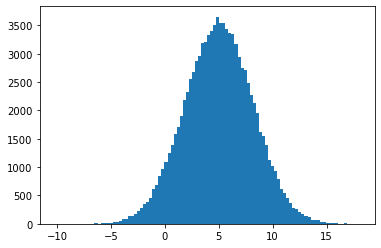

===== Sample size = 100 =====
Population ~ N(5, 10)
Sample mean ~ N(4.996029151832484, 0.9959846528230093)


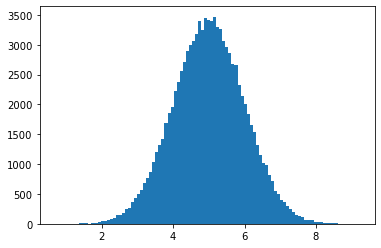

===== Sample size = 1000 =====
Population ~ N(5, 10)
Sample mean ~ N(4.998601068093058, 0.3176363520303667)


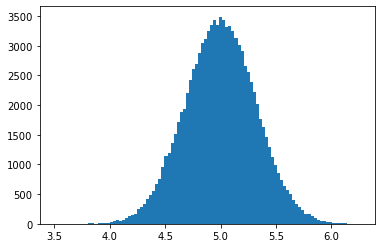

In [9]:
for sample_size in [10,100,1000]:
    sample_means = get_sample_means(sample_size=sample_size, N=100000)
    mu_hat = sample_means.mean()
    sigma_hat = sample_means.std(ddof=1)

    print(f'===== Sample size = {sample_size} =====')
    print(f'Population ~ N({mu}, {std})')
    print(f'Sample mean ~ N({mu_hat}, {sigma_hat})')

    plt.hist(sample_means, bins=100)
    plt.show()